In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#матрицы переходов и эмиссий
k = 6 #количество возможных наблюдаемых состояний
m = int(2) #количество скрытых состояний

pi = np.array([(k-m)/k, m/k])
h = (1 / k)
states = [0, 1]

T = np.array([[0.95, 0.05], [0.1, 0.9]])
E = np.array([[h, h, h, h, h, h], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]])

L = int(300) #длина генерируемой цепочки

In [3]:
def init(k, m):
    if 0 <= np.random.random() < pi[0]:
        H = states[0] #честно
    else:
        H = states[1] #нечестно
    return H

In [4]:
#При заданных параметрех системы используем случайный генератор СММ для того, 
#чтобы получить последовательность наблдаемых величин x длины L и соответствующую ей цепочку скрытых состояний.
def HMM(E, T, L):
    observed = np.array([], dtype=np.int)
    hidden = np.array([], dtype=np.int)
    
    H = init(k, m)
    
    for i in range(L):
        X = np.random.random()
        K = np.random.random()
        
        if (H == 0) and (X < T[0,1]):
            H = 1            
        elif (H == 1) and (X < T[1,0]):
            H = 0
            
        if H == 0:
            hidden = np.append(hidden, [0])
            observed = np.append(observed, [np.random.randint(1, 6)])
        elif H == 1:
            hidden = np.append(hidden, [1])            
            if K < 0.5:
                observed = np.append(observed, [6])                
            else:
                observed = np.append(observed, [np.random.randint(1, 5)])
    return(observed, hidden)

In [5]:
observed, hidden = HMM(E, T, L)

#наблюдение:
print(observed)

#состояние:
print(hidden)

[3 2 5 4 2 5 2 6 1 3 3 4 5 1 5 1 5 4 2 3 2 2 4 5 4 5 5 1 1 3 2 5 2 1 5 2 1
 5 4 5 3 3 6 2 1 1 6 3 3 6 4 6 6 3 6 4 4 2 1 4 5 3 5 3 4 2 4 4 3 4 1 5 4 2
 4 4 1 4 4 4 1 4 1 5 3 2 6 1 6 3 1 6 4 1 6 4 2 6 3 3 2 4 2 6 6 6 6 3 6 6 4
 1 6 6 1 5 1 2 2 2 1 5 2 3 1 3 3 2 4 2 1 4 4 1 2 1 4 4 5 2 4 4 4 2 1 4 3 1
 1 4 5 3 2 2 6 4 6 4 3 6 3 1 4 6 6 1 6 6 2 1 1 6 6 2 4 4 3 1 2 6 1 5 4 5 6
 2 3 6 6 2 1 4 6 1 6 6 6 6 4 6 2 6 6 4 6 6 3 6 6 4 6 6 6 4 6 6 3 3 3 1 5 2
 6 3 2 2 2 1 5 2 3 1 2 4 3 2 1 1 3 4 5 2 3 5 2 3 4 2 6 2 1 6 6 4 6 3 6 3 6
 2 3 6 3 6 1 2 6 5 4 2 2 1 4 2 4 3 1 6 3 4 6 1 3 2 3 1 4 4 6 6 2 6 6 3 6 3
 3 3 6 1]
[0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1
 1 1 1 1 1 1 1 

In [6]:
def viterbi(observed):
    V = np.zeros((L, m))
    ptr = np.zeros((L, m))
    for j in range(m):
        V[0, j] = np.log(E[j, observed[0]-1]) + np.log(pi[j])
    for i in range(1, L):
        for j in range(m):
            if j == 0:
                V[i, j] = np.log(E[j, observed[i]-1]) + np.max([V[i-1][1] + np.log(T[1,0]), V[i-1][j] + np.log(T[j, j])])
                #prom = [V[i-1][1]*T[1,0], V[i-1][j]*T[j, j]]
                #ptr[i, j] = np.argmax(prom)
            if j == 1:
                V[i, j] = np.log(E[j, observed[i]-1]) + np.max([V[i-1][0] + np.log(T[0,1]), V[i-1][j] + np.log(T[j, j])])
                
                #prom = [V[i-1][1]*T[0,1], V[i-1][j]*T[j, j]]
                #ptr[i, j] = np.argmax(prom)
            
            ptr[i, j] = np.argmax(V[i-1] + np.log(T[:, j]))
            
    vit = np.zeros(L, dtype=int)
    
    
    vit[-1] = np.argmax(V[-1] * T[:, -1])
    
    
    for i in range(L - 1, 0, -1):
        
        vit[i - 1] = ptr[i, vit[i]]
    return vit

In [7]:
V = viterbi(observed)
#viterbi = np.argmax(V, axis = 1)   
V

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

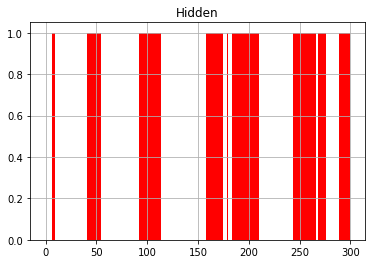

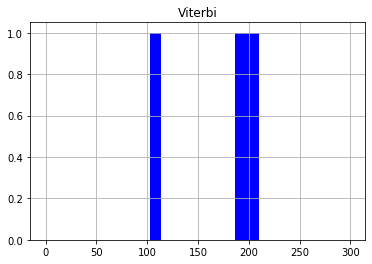

In [8]:
l = np.arange(L)
z1 = hidden
z2 = V

fig = plt.figure()
plt.bar(l, z1, color = 'red')
plt.title('Hidden')
plt.grid(True)

fig = plt.figure()
plt.bar(l, z2, color = 'blue')
plt.title('Viterbi')
plt.grid(True) 

In [9]:
def forward(obs, states, pi, T, E):
    
    fwd = np.zeros((L+1, m))
    for j in range(m):
        fwd[0, j] = pi[j]

    
    for state in states:
        fwd[1, state] = pi[state]*E[state, obs[0]-1]
    for i in range(2, L+1):
        for state1 in states:
            for state2 in states:
                fwd[i, state1] += fwd[i-1, state2]*T[state2, state1]  
            fwd[i, state1] *= E[state1, obs[i-1]-1]
    return fwd[1:]
    
F = forward(observed, states, pi, T, E)
print(F)

[[1.11111111e-001 3.33333333e-002]
 [1.81481481e-002 3.55555556e-003]
 [2.93271605e-003 4.10740741e-004]
 [4.71192387e-004 5.16302469e-005]
 [7.54659654e-005 7.00268416e-006]
 [1.20654893e-005 1.00757140e-006]
 [1.92716199e-006 1.51008872e-007]
 [3.07650796e-007 1.16133042e-007]
 [5.06469267e-008 1.19902278e-008]
 [8.21893386e-009 1.33235513e-009]
 [1.32353711e-009 1.61006631e-010]
 [2.12243487e-010 2.11082824e-011]
 [3.39570235e-011 2.96096285e-012]
 [5.42587810e-012 4.36271774e-013]
 [8.66368561e-013 6.63938501e-014]
 [1.38281586e-013 1.03072893e-014]
 [2.20663727e-014 1.61906397e-015]
 [3.52082674e-015 2.56047621e-016]
 [5.61731694e-016 4.06484196e-017]
 [8.96183252e-017 6.46701623e-018]
 [1.42973518e-017 1.03012309e-018]
 [2.28091608e-018 1.64197837e-019]
 [3.63881677e-019 2.61823857e-020]
 [5.80509719e-020 4.17582310e-021]
 [9.26100094e-021 6.66078938e-022]
 [1.47742646e-021 1.06252109e-022]
 [2.35696725e-022 1.69498221e-023]
 [3.76011452e-023 2.70396762e-024]
 [5.99858078e-024 4.

In [10]:
def backward(obs, states, pi, T, E):
    bk = np.zeros((len(obs), m))    
    bk[-1] = 1
    for i in range(L-2,-1,-1):
        for state in states:
            bk[i, state] = bk[i + 1, 0] + np.log(T[state, 0]) + np.log(E[0, obs[i + 1]-1])
            bk[i, state] += np.log(1 + np.e ** (bk[i + 1, 1] + np.log(T[state, 1]) + np.log(E[1, obs[i + 1]-1]) - (bk[i + 1, 0] + np.log(T[state, 0]) + np.log(E[0, obs[i + 1]-1]))))
            
    return bk
B = backward(observed, states, pi, T, E)
print(B)

[[-521.52738861 -522.89552042]
 [-519.69271515 -521.01524843]
 [-517.85871123 -519.104037  ]
 [-516.0259141  -517.14544565]
 [-514.19529782 -515.12092919]
 [-512.36864152 -513.01585731]
 [-510.54923834 -510.82653511]
 [-508.74333407 -510.1717079 ]
 [-506.90782222 -508.33619605]
 [-505.07231038 -506.50068418]
 [-503.23679853 -504.6651723 ]
 [-501.40128669 -502.8296604 ]
 [-499.56577484 -500.99414845]
 [-497.730263   -499.15863641]
 [-495.89475116 -497.32312422]
 [-494.05923933 -495.48761176]
 [-492.2237275  -493.6520988 ]
 [-490.38821569 -491.81658496]
 [-488.55270391 -489.98106953]
 [-486.71719218 -488.14555124]
 [-484.88168053 -486.31002782]
 [-483.04616904 -484.47449519]
 [-481.21065784 -482.63894599]
 [-479.37514715 -480.80336704]
 [-477.53963739 -478.96773466]
 [-475.70412927 -477.13200631]
 [-473.86862414 -475.29610564]
 [-472.03312434 -473.45989564]
 [-470.19763414 -471.62313078]
 [-468.36216118 -469.78537184]
 [-466.52671921 -467.94583573]
 [-464.69133289 -466.10313472]
 [-462.8

In [11]:
# Апостериорная вероятность
ap = np.log(F[-1, 0]) + np.log(1 + np.e ** (np.log(F[-1, 1]) - np.log(F[-1, 0])))
ap1 = F * np.e ** B / np.e ** ap
ap1 /= np.max(ap1)
ap1

array([[0.94506325, 0.07217886],
       [0.96677244, 0.05046967],
       [0.97782186, 0.03942025],
       [0.98211348, 0.03512863],
       [0.98116283, 0.03607928],
       [0.97463419, 0.04260792],
       [0.96022208, 0.05702003],
       [0.93283702, 0.08440509],
       [0.96261692, 0.05462519],
       [0.97919355, 0.03804856],
       [0.98842074, 0.02882137],
       [0.99355694, 0.02368517],
       [0.99641595, 0.02082616],
       [0.99800738, 0.01923473],
       [0.99889322, 0.01834889],
       [0.99938631, 0.0178558 ],
       [0.99966077, 0.01758134],
       [0.99981352, 0.01742859],
       [0.99989851, 0.0173436 ],
       [0.99994573, 0.01729638],
       [0.99997189, 0.01727022],
       [0.9999862 , 0.01725591],
       [0.99999372, 0.01724839],
       [0.99999711, 0.017245  ],
       [0.99999756, 0.01724455],
       [0.99999523, 0.01724688],
       [0.99998931, 0.0172528 ],
       [0.9999777 , 0.01726441],
       [0.99995629, 0.01728582],
       [0.99991754, 0.01732457],
       [0.

In [12]:
PS = np.zeros((L, m))
for i in range(L):
    for j in range(m):
        PS[i, j] = F[i][j]*B[i][j]/sum(B[0])
for i in range(PS.shape[0]):
    print(np.sum(PS[i]))

0.07217128009385133
0.010804013345172654
0.0016582839340723177
0.00025837027017215674
4.0607567431041416e-05
6.413952035447487e-06
1.0159202896728746e-06
2.0658593596201105e-07
3.04171709006549e-08
4.620728500427663e-09
7.15521473983995e-10
1.1205520951120749e-10
1.7662569100124882e-11
2.7942632532530825e-12
4.4296885406628153e-13
7.030335022635833e-14
1.1164870507721394e-14
1.7737071760298024e-15
2.818326671180743e-16
4.478609613910027e-17
7.117311456723533e-18
1.1310910822566078e-18
1.7975513406988105e-19
2.8566917427307616e-20
4.539851919920889e-21
7.214645954266646e-22
1.1465227957643342e-22
1.821982849072688e-23
2.895339757788076e-24
4.600957900561543e-25
7.311227701783209e-26
1.1617843765704327e-26
1.84609368718421e-27
2.9334228046123115e-28
4.661094749187453e-29
7.406158555772052e-30
1.1767636369140992e-30
1.8697180605084635e-31
2.9706665144912044e-32
4.719810973651424e-33
7.498828593731997e-34
1.191436529874668e-34
2.402149530357906e-35
3.548109541496395e-36
5.400038723100379e-

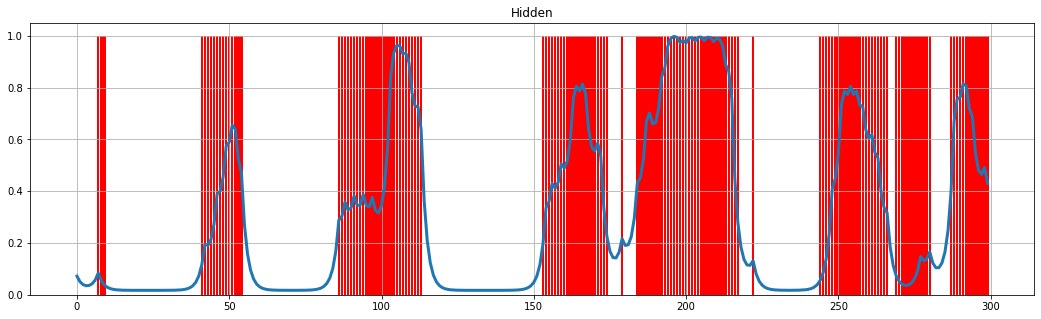

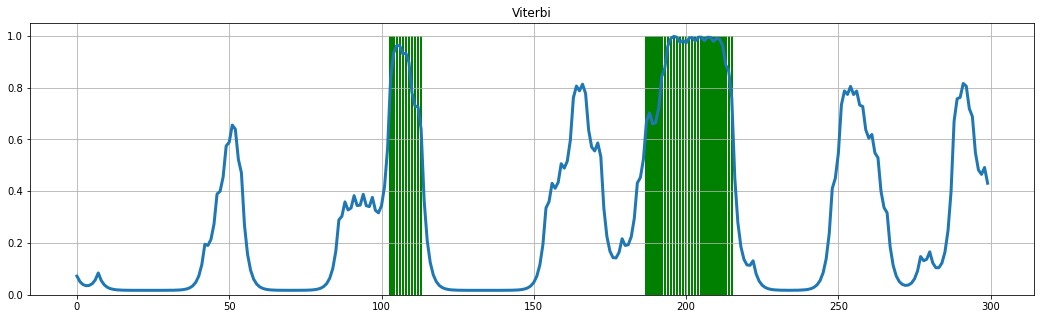

In [13]:
l = np.arange(L)
z1 = hidden
z2 = V

fig, ax = plt.subplots()
plt.bar(l, z1, color = 'red')
plt.title('Hidden')
plt.grid(True)
fig.set_figwidth(18)
fig.set_figheight(5)
ax.plot(range(len(observed)),ap1[:,1], linewidth = 3)

fig, ax = plt.subplots()
plt.bar(l, z2, color = 'green')
plt.title('Viterbi')
plt.grid(True) 
fig.set_figwidth(18)
fig.set_figheight(5)
ax.plot(range(len(observed)),ap1[:,1], linewidth = 3)
